In [1]:
# Random Forest Classifier with Feature Extraction

# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Directories for training and validation data
train_dir = 'D:\\dataset\\train'
val_dir = 'D:\\dataset\\validation'

# Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32


In [2]:
# Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 2301 images belonging to 2 classes.
Found 2280 images belonging to 2 classes.


In [3]:
# Function to extract features using ResNet50
def extract_features(generator):
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    features = []
    labels = []

    for batch, label_batch in generator:
        batch_features = base_model.predict(batch)
        features.extend(batch_features)
        labels.extend(label_batch)
        if len(features) >= generator.samples:  # Avoid infinite loop
            break

    return np.array(features), np.array(labels)

# Extracting features from training and validation data
print("Extracting features for training data...")
train_features, train_labels = extract_features(train_generator)
print("Extracting features for validation data...")
val_features, val_labels = extract_features(val_generator)

# Splitting the data (if needed)
X_train, X_test, y_train, y_test = train_test_split(train_features, np.argmax(train_labels, axis=1), test_size=0.2, random_state=42)


Extracting features for training data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━


🚀 Iniciando treinamento do modelo Random Forest...

🔄 Treinando o modelo Random Forest...

✅ **Acurácia de Validação do Random Forest:** 99.57%

✅ **Acurácia de Teste do Random Forest:** 99.57%

📊 **Relatório de Classificação (Teste):**
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       263
           1       0.99      1.00      0.99       198

    accuracy                           1.00       461
   macro avg       0.99      1.00      1.00       461
weighted avg       1.00      1.00      1.00       461



c:\Users\ViniciusTessele\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\ViniciusTessele\AppData\Local\Temp\ipykernel_7100\3586031526.py:44: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ViniciusTessele\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


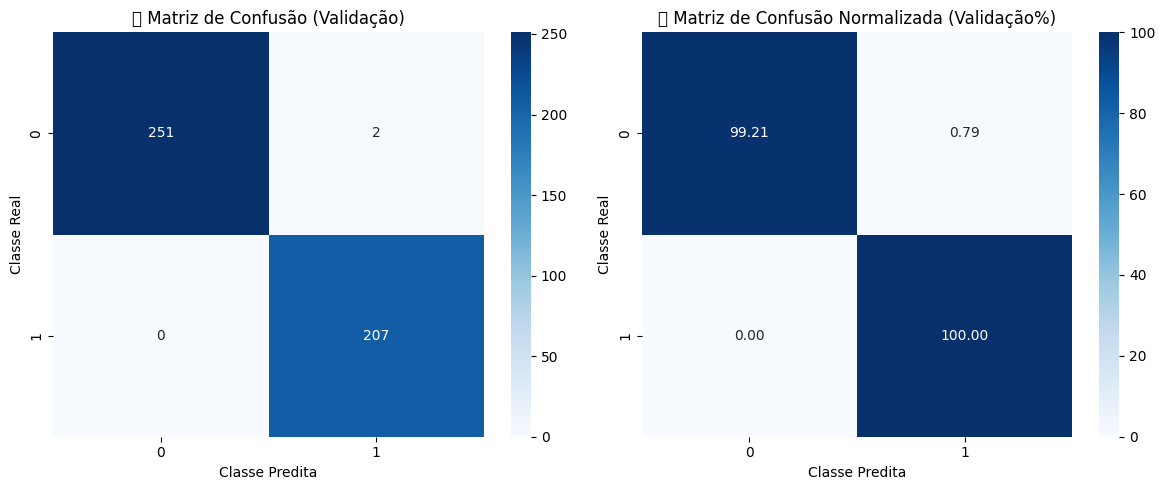


💾 **Modelo Random Forest salvo em:** `saved_models/RandomForest.pkl`


In [ ]:

# Função para treinar e exibir matriz de confusão
def train_random_forest(X_train, y_train, X_test, y_test):
    print("\n🔄 Treinando o modelo Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predições
    y_pred = rf_model.predict(X_test)

    # Avaliação
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n✅ **Acurácia do Random Forest:** {accuracy:.2%}")
    
    print("\n📊 **Relatório de Classificação:**")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Criando subplots para exibir a matriz original e normalizada
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Matriz de confusão absoluta
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), ax=axes[0])
    axes[0].set_title("🔹 Matriz de Confusão Absoluta")
    axes[0].set_xlabel("Classe Predita")
    axes[0].set_ylabel("Classe Real")

    # Matriz de confusão normalizada
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Normaliza cada linha
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), ax=axes[1])
    axes[1].set_title("🔹 Matriz de Confusão Normalizada (%)")
    axes[1].set_xlabel("Classe Predita")
    axes[1].set_ylabel("Classe Real")

    # Ajuste de layout
    plt.tight_layout()
    plt.show()

    return rf_model

# Treinar o modelo e exibir matriz de confusão
print("\n🚀 Iniciando treinamento do modelo Random Forest...")
rf_model = train_random_forest(X_train, y_train, val_features, np.argmax(val_labels, axis=1))

# Salvar modelo
model_path = "saved_models/RandomForest.pkl"
os.makedirs("saved_models", exist_ok=True)
joblib.dump(rf_model, model_path)
print(f"\n💾 **Modelo Random Forest salvo em:** `{model_path}`")
